# **Packages**

In [33]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt

# **Downloading data set**

**In this notebook we will use [Shakespeare Sonnets Dataset,](https://www.opensourceshakespeare.org/views/sonnets/sonnet_view.php?range=viewrange&sonnetrange1=1&sonnetrange2=154) which contains more than 2000 lines of text extracted from Shakespeare's sonnets.**

---



In [ ]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

In [6]:
with open('/content/drive/MyDrive/NLP projects/Text generation/sonnets.txt') as f:
  data = f.read()

corpus = data.lower().split('\n')

print(f'There are {len(corpus)} line of sonnets\n')
print(f'The first 6 lines looks like :')
for i in range(6) :
  print(f'\t{corpus[i]}')

There are 2159 line of sonnets

The first 6 lines looks like :
	from fairest creatures we desire increase,
	that thereby beauty's rose might never die,
	but as the riper should by time decease,
	his tender heir might bear his memory:
	but thou, contracted to thine own bright eyes,
	feed'st thy light'st flame with self-substantial fuel,


# **Tokenization**

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# NOTE : +1 is the 'OOV' word
total_words = len(tokenizer.word_index) + 1

**Notation** 

---


before using texts_to_sequences (converting corpus into sequences) texts_to_sequences expects a list as input and list as output while the input is a string
* so as solution we will pass the string as list for input 
* and take the first element of the output 
* To understand more look for the next example

In [9]:
corpus[0]

'from fairest creatures we desire increase,'

In [10]:
tokenizer.texts_to_sequences(corpus[0])

[[],
 [],
 [58],
 [],
 [],
 [],
 [17],
 [6],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 []]

In [14]:
ot = tokenizer.texts_to_sequences([corpus[0]])
ot

[[34, 417, 877, 166, 213, 517]]

In [15]:
output = ot[0]
output

[34, 417, 877, 166, 213, 517]

# **N-Grams**

In [18]:
def n_grams(corpus, tokenizer) :
  """
    Generates a list of n-gram sequences
    
    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    
    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
  """

  input_seq = []

  for line in corpus : 
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)) :
      n_gram_seq = token_list[:i+1]
      input_seq.append(n_gram_seq)

  return input_seq 

In [19]:
first_example_sequence = n_grams([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [20]:
next_3_examples_sequence = n_grams(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

**Applying for the whole corpus**

---



In [22]:
input_seq = n_grams(corpus, tokenizer)

max_input_seq_len = max([len(i) for i in input_seq])

print(f'Max length of n-grams = {max_input_seq_len}')
print(f'len on n-grams = {len(input_seq)}')

Max lne of n-grams = 11
len on n-grams = 15462


# **Padding**

In [30]:
def pad_seq(input_seq, max_len) :
  """
    Pads tokenized sequences to the same length
    
    Args:
        input_seq (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
  """

  max_seq_len = max([len(x) for x in input_seq])
  padded_seq = np.array(pad_sequences(input_seq, maxlen = max_seq_len, padding='pre'))

  return padded_seq


In [31]:
first_padded_seq = pad_seq(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[  0,   0,   0,   0,  34, 417],
       [  0,   0,   0,  34, 417, 877],
       [  0,   0,  34, 417, 877, 166],
       [  0,  34, 417, 877, 166, 213],
       [ 34, 417, 877, 166, 213, 517]], dtype=int32)

In [42]:
# Pad the whole corpus
padded_input_seq = pad_seq(input_seq, max_input_seq_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


# **Splitting data**

In [38]:
def features_and_labels(input_seq, total_words) :
  """
    Generates features and labels from n-grams
    
    Args:
        input_seq (list of int): sequences to split features and labels from
        total_words (int): vocabulary size
    
    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
  """

  features = input_seq[:, :-1]
  labels = input_seq[:,-1]
  one_hot_labels  = to_categorical(labels, num_classes=total_words)

  return features, one_hot_labels 

In [39]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (5, 3211)

features look like this:



array([[  0,   0,   0,   0,  34],
       [  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213]], dtype=int32)

In [43]:
# Split the whole corpus
features, labels = features_and_labels(padded_input_seq, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


# **Model**

In [50]:
def create_model(total_words, max_input_seq_len):
  model= tf.keras.models.Sequential([
      tf.keras.layers.Embedding(total_words, 100, input_length = max_input_seq_len -1),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
      tf.keras.layers.Dense(total_words, activation='softmax')
  ])

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


In [51]:
model = create_model(total_words, max_input_seq_len)

history = model.fit(features, labels, epochs= 50, verbose=1)

Epoch 1/50
484/484 [==============================] - 41s 75ms/step - loss: 6.8893 - accuracy: 0.0232
Epoch 2/50
484/484 [==============================] - 34s 70ms/step - loss: 6.4261 - accuracy: 0.0321
Epoch 3/50
484/484 [==============================] - 36s 74ms/step - loss: 6.1851 - accuracy: 0.0413
Epoch 4/50
484/484 [==============================] - 35s 73ms/step - loss: 5.9176 - accuracy: 0.0515
Epoch 5/50
484/484 [==============================] - 34s 70ms/step - loss: 5.5999 - accuracy: 0.0644
Epoch 6/50
484/484 [==============================] - 36s 74ms/step - loss: 5.2256 - accuracy: 0.0770
Epoch 7/50
484/484 [==============================] - 37s 76ms/step - loss: 4.8162 - accuracy: 0.0974
Epoch 8/50
484/484 [==============================] - 35s 72ms/step - loss: 4.3845 - accuracy: 0.1348
Epoch 9/50
484/484 [==============================] - 36s 75ms/step - loss: 3.9524 - accuracy: 0.1925
Epoch 10/50
484/484 [==============================] - 36s 75ms/step - loss: 3.540

In [52]:
model.save('Next_words.h5')

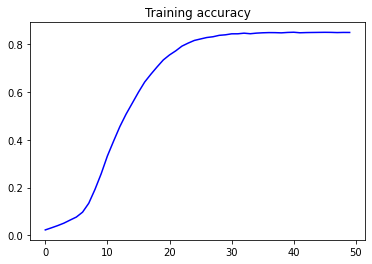

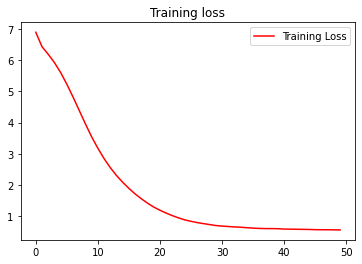

In [54]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# **History as pickle**

In [55]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model in action**

In [57]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_input_seq_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

print(seed_text)
     

Help me Obi Wan Kenobi, you're my only hope and loss of thine eyes thee her all too near me 'will ' have end it told i joy have it no old glad is best ' that that mine eye not lies lies near 'will so free ' speak the ever looks now may say you so poet is not so show ' ' with thee with me can mine eye eye with thy part ' with my tongue one part may know thy place thy 'will ' blind lie with mine own bright thy part ever thee i think thee thence her chest live wide treasure new long
